In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import missingno as msno

In [ ]:
path = '/content/housing.csv'
data = pd.read_csv(path)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:

data.shape

(20433, 10)

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show(close=None, block=None)>

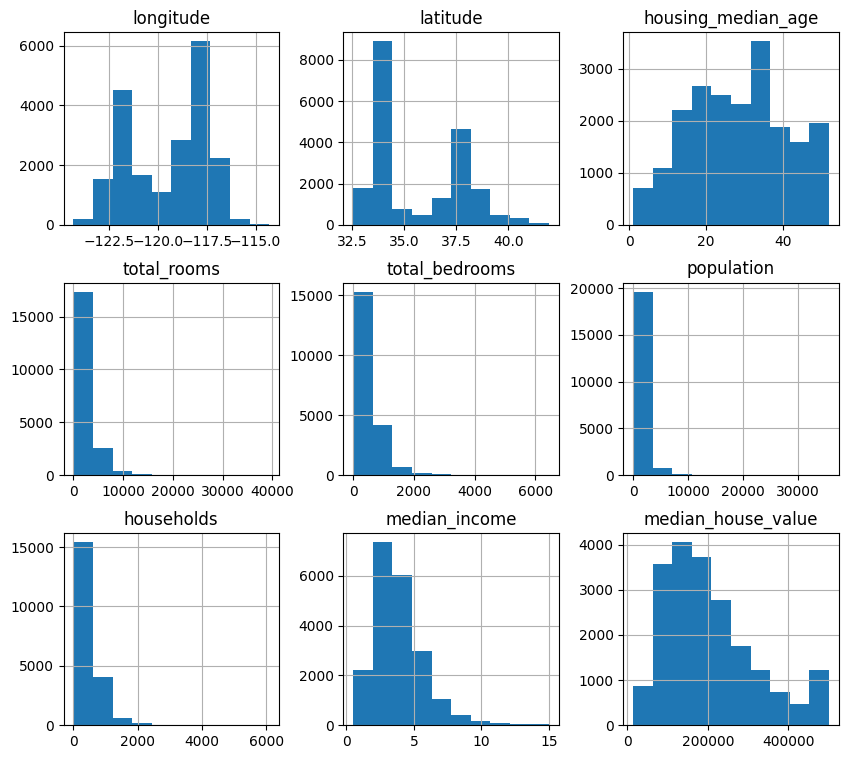

In [ ]:
data.hist(figsize = (10,9))
plt.show

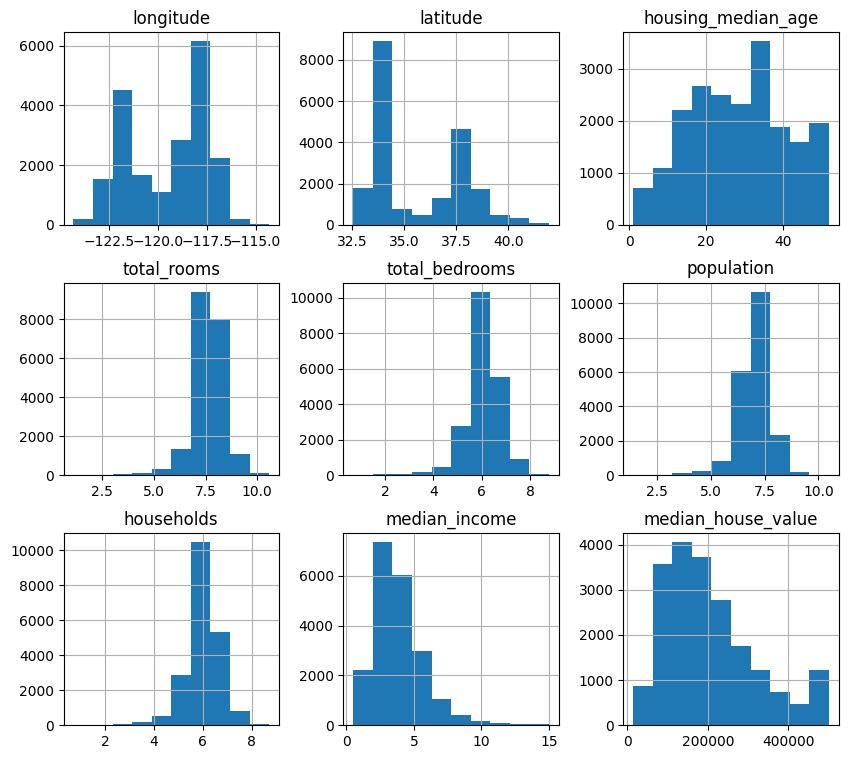

In [ ]:
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data[ 'population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

data.hist(figsize = (10, 9))
plt.show()

In [ ]:
data['ocean_proximity'].value_counts()


,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [ ]:
pd.get_dummies(data.ocean_proximity)


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [ ]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)


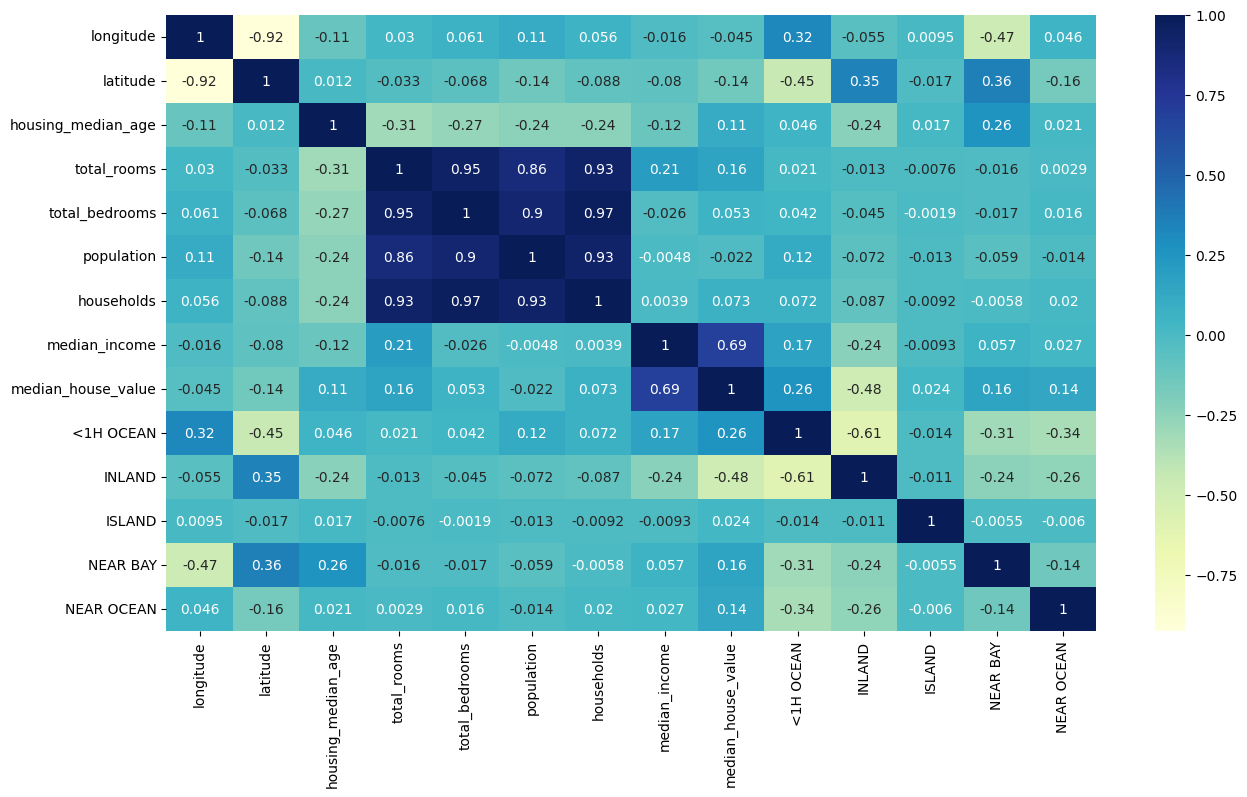

In [ ]:
#to see how the new variables correlate with the value
plt.figure(figsize = (15, 8))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

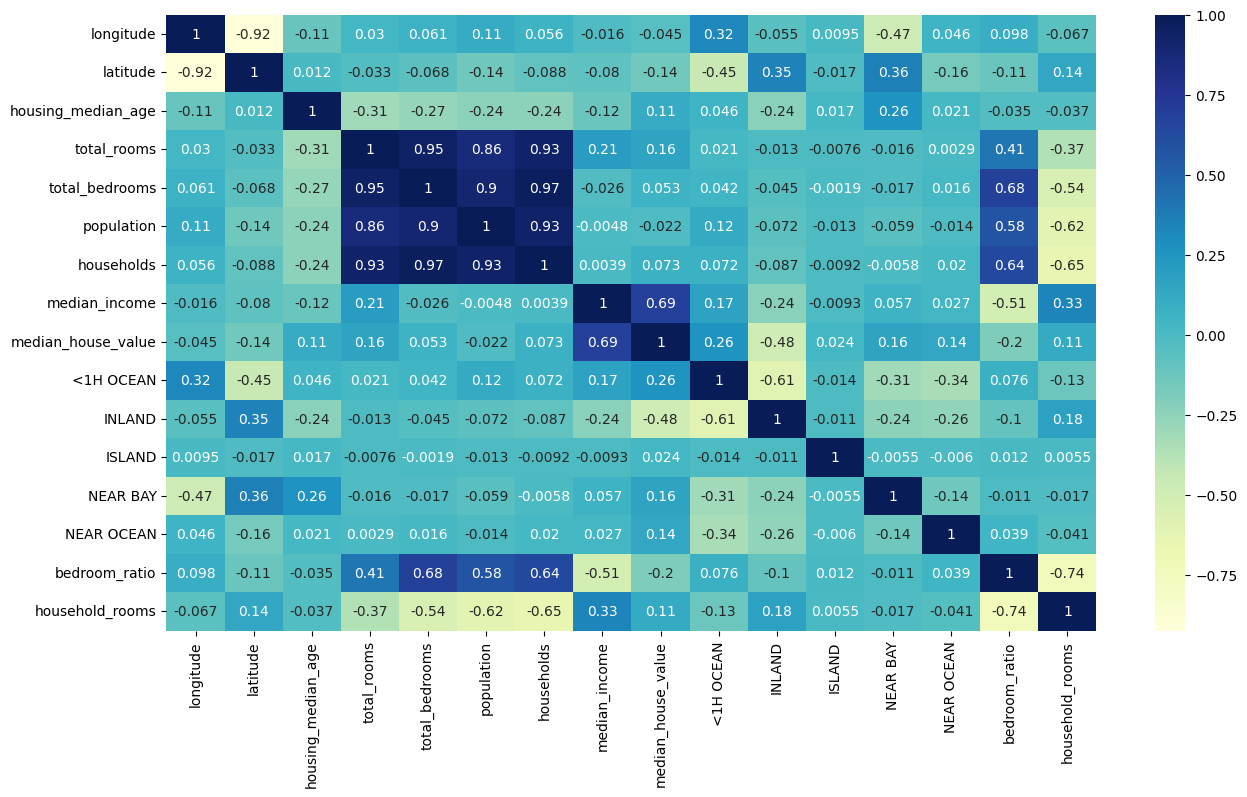

In [ ]:
#adding new variables based on analysis above. Feature Engineering
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']

plt.figure(figsize = (15, 8))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN', 'bedroom_ratio', 'household_rooms'],
      dtype='object')

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,False,False,False,True,False,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,False,False,False,True,False,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,False,False,False,True,False,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,False,False,False,True,False,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,False,False,False,True,False,0.762444,1.329892


In [ ]:
class CustomScaler:
    def __init__(self, columns_to_scale):
        self.columns_to_scale = columns_to_scale
        self.scaler = StandardScaler()

    def fit(self, data):
        selected_columns_data = data[self.columns_to_scale]
        self.scaler.fit(selected_columns_data)

    def transform(self, data):
        scaled_data = data.copy()
        selected_columns_data = data[self.columns_to_scale]
        selected_columns_scaled = self.scaler.transform(selected_columns_data)
        scaled_columns_df = pd.DataFrame(selected_columns_scaled, columns=self.columns_to_scale, index=data.index)
        scaled_data[self.columns_to_scale] = scaled_columns_df
        return scaled_data

In [ ]:
columns_to_scale = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'bedroom_ratio', 'household_rooms']


scaler = CustomScaler(columns_to_scale)


x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']


from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)


scaler.fit(x_train)



X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(16346, 15) (16346,)
(4087, 15) (4087,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test, y_test)


0.8177763485783393

PICKLE EXPORTING MODEL

In [ ]:
import pickle


with open('Prediction_Model.pkl', 'wb') as file:
      pickle.dump(forest, file)


with open('Prediction_Scaler.pkl', 'wb') as file:
      pickle.dump(scaler, file)


loaded_model = pickle.load(open('Prediction_Model.pkl', 'rb'))


loaded_scaler = pickle.load(open('Prediction_Scaler.pkl', 'rb'))


prediction = loaded_model.predict(x_test)


#Comparing predictions with the actual values
print("Predictions: ", prediction)
y_values = y_test.values
print("Actual values: ", y_values)

Predictions:  [215868. 230969. 163139. ...  87680. 119224. 122866.]
Actual values:  [206300. 102500. 159100. ...  92200. 120600.  85800.]


In [ ]:
df1 = pd.DataFrame(y_values, columns=['Actual Prices'])
df2 = pd.DataFrame(prediction, columns=['Predicted Prices'])

Comparing = pd.concat([df1, df2], axis=1)
Comparing

,Actual Prices,Predicted Prices
0,206300.0,217991.00
1,102500.0,230717.00
2,159100.0,165119.00
3,335300.0,315772.00
4,75000.0,147846.98
...,...,...
4082,54300.0,70907.00
4083,368700.0,352135.02
4084,92200.0,83029.00
4085,120600.0,117624.00


TAKE INPUT DATA AND PREDICT

In [ ]:
def append_input_data(data_frame, input_data):

    longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, \
    median_income, ocean, inland, island, near_bay, near_ocean, bedroom_ratio, household_rooms = input_data


    new_data = {'longitude': [longitude], 'latitude': [latitude], 'housing_median_age': [housing_median_age],
                'total_rooms': [total_rooms], 'total_bedrooms': [total_bedrooms], 'population': [population],
                'households': [households], 'median_income': [median_income], '<1H OCEAN': [ocean], 'INLAND': [inland],
                'ISLAND': [island], 'NEAR BAY': [near_bay], 'NEAR OCEAN': [near_ocean],
                'bedroom_ratio': [bedroom_ratio], 'household_rooms': [household_rooms] }

    new_df = pd.DataFrame(new_data)
    updated_df = pd.concat([data_frame, new_df], ignore_index=True)
    return updated_df

data = {'longitude' : [], 'latitude' : [], 'housing_median_age' : [], 'total_rooms': [],
       'total_bedrooms' : [], 'population' : [], 'households' : [], 'median_income' : [],
       '<1H OCEAN' : [], 'INLAND' : [], 'ISLAND' : [], 'NEAR BAY' : [],
       'NEAR OCEAN' : [], 'bedroom_ratio' : [], 'household_rooms' : []}
df = pd.DataFrame(data)


In [ ]:
def House_Price_Prediction(input_data):

    dff = append_input_data(df, input_data)

    last_row = dff.tail(1)
    last_row

    input_data = (last_row)

    loaded_scaler.fit(input_data)
    scaled_data = loaded_scaler.transform(input_data)

    prediction = loaded_model.predict(scaled_data)
    predictionn = ', '.join(map(str, prediction))

    additional_text = 'The price is estimated to be around :'
    result = additional_text, predictionn

    output = "{} {}".format(result[0], result[1])

    return output


In [ ]:
input_data = (-122.23, 37.88, 41, 880, 129, 322, 126, 8.3252, 0, 1, 0, 0, 1, 1.02, 7.14)

result = House_Price_Prediction(input_data)
print(result)

The price is estimated to be around : 168122.02


In [ ]:
with open('NPrediction_Scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)